In [1]:
import preproc_RNN_LSTM
import pandas as pd
import plot_evaluate_models
import matplotlib.pyplot as plt
from metrics import get_baseline_data
import numpy as np
import math
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import TimeDistributed, Dropout, BatchNormalization
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from baseline import get_baseline_actual, get_baseline_predictions, forecast_accuracy
from preproc import get_format
# Import section
from datetime import datetime
from webbrowser import get
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from clean import clean_all, get_data, get_bairros_data

# load input data

In [2]:
data =preproc_RNN_LSTM.get_baseline_data("raw_data/preproc_data_rate.csv")

In [3]:
len_ = int(0.8*data.shape[0])
test_data = data[len_:]

# set params

In [4]:
n_sequences=3000
length=100
prediction_horizon = 31

In [6]:
#test_extended_data = pd.concat([test_data, janeiro_pred], axis=0).reset_index().drop(columns='index')
#pred = test_extended_data.copy()
#pred.iloc[:,1:] = None
#pred

# Load model and compute ypred

In [7]:
model_upload =models.load_model('models/allAR_3000_100_31')

2022-03-09 12:56:17.554155: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
y_pred_upload = plot_evaluate_models.compute_pred_test(data,model_upload,length, prediction_horizon)

In [9]:
y_pred_upload.shape

(804, 31)

# Extend y_pred with january 2020

In [10]:
idx_janeiro = pd.date_range('2020-01-01', '2020-01-31').date
janeiro_pred = pd.DataFrame(columns=data.columns)
janeiro_pred['Date'] = idx_janeiro

In [11]:
test_extended_data = pd.concat([y_pred_upload, janeiro_pred], axis=0).reset_index().drop(columns='index')
pred = test_extended_data.copy()

#pred[65:110]

# Compute last months and fill last month on pred

In [12]:
input_1 = test_data.iloc[735:804,]

In [13]:
input_1.drop(columns="Date",inplace=True)

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
input_1.shape

(69, 30)

In [15]:
pred_1 = model_upload.predict(input_1.to_numpy().reshape(1,(length-prediction_horizon),30))[0]

In [16]:
pred_1_df = pd.DataFrame(pred_1)

In [17]:
pred.iloc[804:835,1:] = pred_1_df

In [18]:
pred

,Date,Anchieta,Bangu,Barra da Tijuca,Botafogo,Campo Grande,Centro,Cidade de Deus,Complexo do Alemao,Copacabana,...,Portuaria,Ramos,Realengo,Rio Comprido,Rocinha,Santa Cruz,Santa Teresa,Sao Cristovao,Tijuca,Vila Isabel
0,2017-10-19 00:00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2017-10-20 00:00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2017-10-21 00:00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,2017-10-22 00:00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,2017-10-23 00:00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2020-01-27,0.128254,0.045776,0.049507,0.169991,0.024219,2.312851,0.0,0.0,0.174652,...,0.280818,0.08636,0.050388,0.225385,0.0,0.028823,0.0,0.225822,0.081606,0.100729
831,2020-01-28,0.124243,0.045803,0.052808,0.204278,0.023052,2.357293,0.0,0.0,0.17251,...,0.269085,0.086635,0.050237,0.219095,0.0,0.027775,0.0,0.221998,0.086859,0.099792
832,2020-01-29,0.122964,0.046167,0.053439,0.217713,0.021815,2.296086,0.0,0.0,0.163761,...,0.258205,0.086855,0.050393,0.21098,0.0,0.026088,0.0,0.220227,0.090547,0.098629
833,2020-01-30,0.124398,0.046294,0.051572,0.209323,0.021175,2.145467,0.0,0.0,0.150744,...,0.251712,0.08663,0.050707,0.205341,0.0,0.024717,0.0,0.219099,0.090842,0.097113


# Compute second last month

In [19]:
input_2 = test_data.iloc[713:782,1:]

In [20]:
input_2

,Anchieta,Bangu,Barra da Tijuca,Botafogo,Campo Grande,Centro,Cidade de Deus,Complexo do Alemao,Copacabana,Guaratiba,...,Portuaria,Ramos,Realengo,Rio Comprido,Rocinha,Santa Cruz,Santa Teresa,Sao Cristovao,Tijuca,Vila Isabel
3927,0.082043,0.045084,0.022698,0.071826,0.023513,0.679915,0.000000,0.000000,0.114301,0.007922,...,0.181279,0.072618,0.056064,0.141398,0.000000,0.012346,0.067305,0.167137,0.060843,0.057800
3928,0.075732,0.032203,0.078411,0.082877,0.017635,1.068438,0.000000,0.000000,0.179616,0.011884,...,0.036256,0.116189,0.077627,0.060599,0.011689,0.012346,0.033653,0.191014,0.098869,0.115600
3929,0.044177,0.040790,0.383800,0.049726,0.014695,0.922742,0.062570,0.000000,0.179616,0.019806,...,0.181279,0.123451,0.047438,0.100998,0.000000,0.012346,0.000000,0.143260,0.060843,0.108375
3930,0.100976,0.034350,0.103172,0.066301,0.023513,1.505527,0.000000,0.000000,0.146959,0.019806,...,0.036256,0.094404,0.038813,0.060599,0.000000,0.014815,0.100958,0.262644,0.053237,0.050575
3931,0.018933,0.025762,0.066030,0.082877,0.013226,0.922742,0.000000,0.000000,0.048986,0.011884,...,0.145023,0.079880,0.064689,0.020200,0.000000,0.009877,0.033653,0.191014,0.022816,0.028900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,0.063110,0.042937,0.033015,0.049726,0.019104,0.631350,0.031285,0.000000,0.106137,0.011884,...,0.145023,0.116189,0.043126,0.060599,0.000000,0.012346,0.100958,0.214890,0.114080,0.122825
3992,0.069421,0.025762,0.022698,0.049726,0.032330,1.262700,0.000000,0.016988,0.048986,0.003961,...,0.108767,0.116189,0.090564,0.141398,0.000000,0.007407,0.067305,0.047753,0.083659,0.050575
3993,0.050488,0.038643,0.024761,0.033151,0.014695,1.165569,0.031285,0.000000,0.122466,0.007922,...,0.326302,0.043571,0.056064,0.080799,0.000000,0.012346,0.100958,0.071630,0.045632,0.043350
3994,0.050488,0.021468,0.010317,0.022100,0.013226,0.339958,0.000000,0.000000,0.114301,0.023767,...,0.253791,0.014524,0.034501,0.080799,0.000000,0.009877,0.000000,0.143260,0.022816,0.144500


In [21]:
input_2.to_numpy().reshape(1,(length-prediction_horizon),30).shape

(1, 69, 30)

In [22]:
pred_2 = model_upload.predict(input_2.to_numpy().reshape(1,(length-prediction_horizon),30))[0]

In [23]:
pred_2_df = pd.DataFrame(pred_2)

In [24]:
pred_2_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.059299,0.034403,0.036501,0.070738,0.021933,1.016985,0.005834,0.0,0.078413,0.012434,...,0.082845,0.065336,0.036536,0.089490,0.0,0.020337,0.056051,0.138371,0.058525,0.047426
1,0.066660,0.036749,0.039395,0.075513,0.020140,0.995756,0.000000,0.0,0.089004,0.007044,...,0.087012,0.071096,0.037375,0.089490,0.0,0.017975,0.000000,0.151325,0.064238,0.050027
2,0.066780,0.036963,0.039635,0.075276,0.020005,0.937585,0.000000,0.0,0.089419,0.006587,...,0.087904,0.071934,0.037406,0.089665,0.0,0.017715,0.000000,0.152819,0.065095,0.050507
3,0.066352,0.037011,0.039595,0.075030,0.020106,0.900012,0.000000,0.0,0.088745,0.006748,...,0.088708,0.072228,0.037420,0.090297,0.0,0.017792,0.000000,0.153307,0.065482,0.050942
4,0.065993,0.037115,0.039618,0.075284,0.020200,0.877057,0.001144,0.0,0.088361,0.006864,...,0.089490,0.072577,0.037461,0.090973,0.0,0.017880,0.000000,0.153997,0.065975,0.051466
5,0.065726,0.037257,0.039702,0.075853,0.020262,0.862095,0.003534,0.0,0.088290,0.006900,...,0.090226,0.072978,0.037515,0.091586,0.0,0.017941,0.000000,0.154822,0.066533,0.052010
6,0.065533,0.037409,0.039819,0.076562,0.020300,0.851749,0.005003,0.0,0.088425,0.006885,...,0.090917,0.073387,0.037572,0.092125,0.0,0.017978,0.000000,0.155670,0.067090,0.052532
7,0.065395,0.037554,0.039946,0.077304,0.020323,0.844515,0.005809,0.0,0.088679,0.006844,...,0.091558,0.073770,0.037628,0.092597,0.0,0.018000,0.000000,0.156465,0.067602,0.053007
8,0.065289,0.037684,0.040071,0.078020,0.020336,0.839721,0.006131,0.0,0.088996,0.006793,...,0.092131,0.074108,0.037681,0.093000,0.0,0.018013,0.000000,0.157165,0.068047,0.053423
9,0.065199,0.037793,0.040185,0.078677,0.020343,0.837015,0.006103,0.0,0.089340,0.006741,...,0.092613,0.074391,0.037728,0.093327,0.0,0.018019,0.000000,0.157742,0.068414,0.053771


In [25]:
pred_2_df.iloc[:-9,]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.059299,0.034403,0.036501,0.070738,0.021933,1.016985,0.005834,0.0,0.078413,0.012434,...,0.082845,0.065336,0.036536,0.089490,0.0,0.020337,0.056051,0.138371,0.058525,0.047426
1,0.066660,0.036749,0.039395,0.075513,0.020140,0.995756,0.000000,0.0,0.089004,0.007044,...,0.087012,0.071096,0.037375,0.089490,0.0,0.017975,0.000000,0.151325,0.064238,0.050027
2,0.066780,0.036963,0.039635,0.075276,0.020005,0.937585,0.000000,0.0,0.089419,0.006587,...,0.087904,0.071934,0.037406,0.089665,0.0,0.017715,0.000000,0.152819,0.065095,0.050507
3,0.066352,0.037011,0.039595,0.075030,0.020106,0.900012,0.000000,0.0,0.088745,0.006748,...,0.088708,0.072228,0.037420,0.090297,0.0,0.017792,0.000000,0.153307,0.065482,0.050942
4,0.065993,0.037115,0.039618,0.075284,0.020200,0.877057,0.001144,0.0,0.088361,0.006864,...,0.089490,0.072577,0.037461,0.090973,0.0,0.017880,0.000000,0.153997,0.065975,0.051466
5,0.065726,0.037257,0.039702,0.075853,0.020262,0.862095,0.003534,0.0,0.088290,0.006900,...,0.090226,0.072978,0.037515,0.091586,0.0,0.017941,0.000000,0.154822,0.066533,0.052010
6,0.065533,0.037409,0.039819,0.076562,0.020300,0.851749,0.005003,0.0,0.088425,0.006885,...,0.090917,0.073387,0.037572,0.092125,0.0,0.017978,0.000000,0.155670,0.067090,0.052532
7,0.065395,0.037554,0.039946,0.077304,0.020323,0.844515,0.005809,0.0,0.088679,0.006844,...,0.091558,0.073770,0.037628,0.092597,0.0,0.018000,0.000000,0.156465,0.067602,0.053007
8,0.065289,0.037684,0.040071,0.078020,0.020336,0.839721,0.006131,0.0,0.088996,0.006793,...,0.092131,0.074108,0.037681,0.093000,0.0,0.018013,0.000000,0.157165,0.068047,0.053423
9,0.065199,0.037793,0.040185,0.078677,0.020343,0.837015,0.006103,0.0,0.089340,0.006741,...,0.092613,0.074391,0.037728,0.093327,0.0,0.018019,0.000000,0.157742,0.068414,0.053771


In [27]:
pred.iloc[782:804,1:] = pred_2_df.iloc[:-9,]

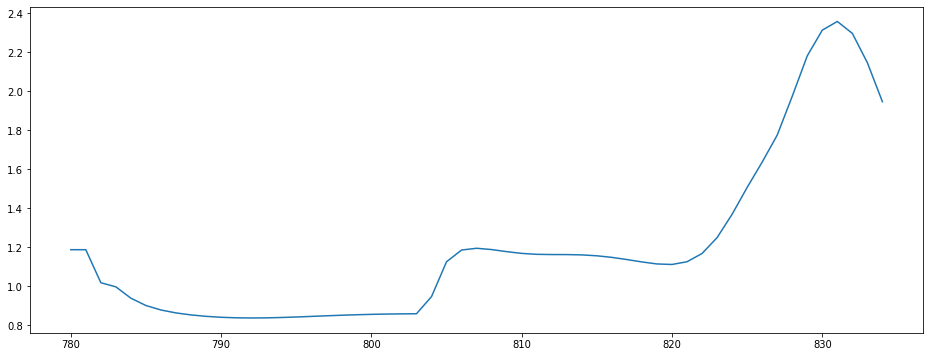

In [34]:
plt.figure(figsize=(16,6))
plt.plot(pred[["Centro"]].iloc[780:,])

# Final output from 2018-04-06

In [48]:
pred_final = pred.iloc[169:,]

In [52]:
pred_final.isna().sum()

Date                  0
Anchieta              0
Bangu                 0
Barra da Tijuca       0
Botafogo              0
Campo Grande          0
Centro                0
Cidade de Deus        0
Complexo do Alemao    0
Copacabana            0
Guaratiba             0
Ilha do Governador    0
Inhauma               0
Iraja                 0
Jacarepagua           0
Jacarezinho           0
Lagoa                 0
Madureira             0
Mare                  0
Meier                 0
Pavuna                0
Portuaria             0
Ramos                 0
Realengo              0
Rio Comprido          0
Rocinha               0
Santa Cruz            0
Santa Teresa          0
Sao Cristovao         0
Tijuca                0
Vila Isabel           0
dtype: int64

In [53]:
pred_final

,Date,Anchieta,Bangu,Barra da Tijuca,Botafogo,Campo Grande,Centro,Cidade de Deus,Complexo do Alemao,Copacabana,...,Portuaria,Ramos,Realengo,Rio Comprido,Rocinha,Santa Cruz,Santa Teresa,Sao Cristovao,Tijuca,Vila Isabel
169,2018-04-06 00:00:00,0.091176,0.045067,0.043339,0.085715,0.024392,1.162303,0.01919,0.0,0.085979,...,0.147761,0.09095,0.045292,0.15541,0.0,0.022256,0.006723,0.208248,0.085228,0.078142
170,2018-04-07 00:00:00,0.091472,0.045202,0.043403,0.085782,0.024489,1.164907,0.021034,0.0,0.085879,...,0.148718,0.091301,0.045413,0.156635,0.0,0.022345,0.015496,0.209274,0.085618,0.078625
171,2018-04-08 00:00:00,0.091694,0.045305,0.043454,0.085832,0.024562,1.166564,0.022543,0.0,0.085811,...,0.149453,0.091573,0.045504,0.15758,0.0,0.022412,0.022629,0.210063,0.08592,0.078992
172,2018-04-09 00:00:00,0.091859,0.045383,0.043495,0.085867,0.024619,1.167572,0.023783,0.0,0.085764,...,0.150012,0.091783,0.045571,0.158305,0.0,0.022463,0.028433,0.210671,0.086152,0.079271
173,2018-04-10 00:00:00,0.091979,0.045442,0.043526,0.085888,0.024661,1.168156,0.024797,0.0,0.085729,...,0.150431,0.091944,0.045621,0.158855,0.0,0.0225,0.033167,0.211134,0.086331,0.07948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2020-01-27,0.128254,0.045776,0.049507,0.169991,0.024219,2.312851,0.0,0.0,0.174652,...,0.280818,0.08636,0.050388,0.225385,0.0,0.028823,0.0,0.225822,0.081606,0.100729
831,2020-01-28,0.124243,0.045803,0.052808,0.204278,0.023052,2.357293,0.0,0.0,0.17251,...,0.269085,0.086635,0.050237,0.219095,0.0,0.027775,0.0,0.221998,0.086859,0.099792
832,2020-01-29,0.122964,0.046167,0.053439,0.217713,0.021815,2.296086,0.0,0.0,0.163761,...,0.258205,0.086855,0.050393,0.21098,0.0,0.026088,0.0,0.220227,0.090547,0.098629
833,2020-01-30,0.124398,0.046294,0.051572,0.209323,0.021175,2.145467,0.0,0.0,0.150744,...,0.251712,0.08663,0.050707,0.205341,0.0,0.024717,0.0,0.219099,0.090842,0.097113
